In [3]:
import warnings
from torch.nn import MSELoss
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from IPython.display import YouTubeVideo
from IPython.display import clear_output
from IPython.display import Image as show_gif
# from skimage.util import montage
from skimage.transform import resize
import imageio
# import seaborn as sns
# import matplotlib.gridspec as gridspec
# import matplotlib.patches as mpatches
# import matplotlib.animation as anim
# from matplotlib import cm
import matplotlib.pyplot as plt
# import h5py
# import nilearn.plotting as nlplt
# import nilearn as nl
import nibabel as nib
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import pandas as pd
# from scipy import stats
import numpy as np
from random import randint
import time
import os
# from tqdm import tqdm
import torch
# import torchvision.transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from numba import cuda
# import torchvision.transforms as transforms


import SimpleITK as sitk
from glob import glob



# 提取所有test(n)niiWarped.nii.gz目录

In [ ]:
import os
affine_path = '/data2/zhanghao/data/andi_affine/'
affine_paths = []

for i in os.listdir(affine_path):
    if 'Warped' in i and 'Inverse' not in i: affine_paths.append(os.path.join(affine_path,i))



# 生成npy文件

In [20]:
import numpy as np
import SimpleITK as sitk
from glob import glob
import skimage
import skimage.io
from skimage import img_as_ubyte

npy_path = '/data2/zhanghao/data/adni_affine_192_176_144/'
def trans_to_npy(img_path):
    #load image
    img= sitk.ReadImage(img_path)


    #get array
    img = sitk.GetArrayFromImage(img)


    #to numpy
    img = img.astype(np.float32)  

    #crop
    img = img[16:208,8:184,8:152]


    #norm
    img = (img-img.min())/(img.max()-img.min())

    # # add channel
    # img = img[np.newaxis, ::, ::, ::]

    print(img_path.split('/')[-1].split('.')[0],img.shape,img.max(),img.min())
    np.save(npy_path+img_path.split('/')[-1].split('.')[0] +'.npy',img)

    

for i in affine_paths:
    trans_to_npy(i)


test1566 (192, 176, 144) 1.0 0.0
test1970 (192, 176, 144) 1.0 0.0
test2292 (192, 176, 144) 1.0 0.0
test593 (192, 176, 144) 1.0 0.0
test973 (192, 176, 144) 1.0 0.0
test1683 (192, 176, 144) 1.0 0.0
test1802 (192, 176, 144) 1.0 0.0
test426 (192, 176, 144) 1.0 0.0
test2015 (192, 176, 144) 1.0 0.0
test1890 (192, 176, 144) 1.0 0.0
test161 (192, 176, 144) 1.0 0.0
test2169 (192, 176, 144) 1.0 0.0
test2191 (192, 176, 144) 1.0 0.0
test1469 (192, 176, 144) 1.0 0.0
test1813 (192, 176, 144) 1.0 0.0
test1326 (192, 176, 144) 1.0 0.0
test737 (192, 176, 144) 1.0 0.0
test2231 (192, 176, 144) 1.0 0.0
test2285 (192, 176, 144) 1.0 0.0
test1458 (192, 176, 144) 1.0 0.0
test370 (192, 176, 144) 1.0 0.0
test2262 (192, 176, 144) 1.0 0.0
test1459 (192, 176, 144) 1.0 0.0
test333 (192, 176, 144) 1.0 0.0
test1727 (192, 176, 144) 1.0 0.0
test1599 (192, 176, 144) 1.0 0.0
test303 (192, 176, 144) 1.0 0.0
test811 (192, 176, 144) 1.0 0.0
test1007 (192, 176, 144) 1.0 0.0
test2124 (192, 176, 144) 1.0 0.0
test648 (192, 176, 

# 分成234个testdata和2100个traindata

In [25]:
path = '/data2/zhanghao/data/adni_affine_192_176_144/'
train_path = '/data2/zhanghao/data/adni_affine_192_176_144/train_data/'
test_path = '/data2/zhanghao/data/adni_affine_192_176_144/test_data/'
import shutil

srcDir = path
dstDir = train_path 
files = os.listdir(srcDir)
cnt = 0
for f in files: 
    if f == 'train_data' or f == 'test_data':continue
    if cnt == 2100: break
    src = srcDir+f 
    dst = dstDir +f 
    shutil.move(src,dst)
    cnt += 1

In [26]:
srcDir = path
dstDir = test_path
files = os.listdir(srcDir)
for f in files: 
    if f == 'train_data' or f == 'test_data':continue
    if cnt == 233: break
    src = srcDir+f 
    dst = dstDir +f 
    shutil.move(src,dst)
    cnt += 1

In [14]:
import shutil
import os
path = '/data2/zhanghao/adni/train_npy/x/'
train_path = '/data2/zhanghao/adni/train_npy/train_data/'
test_path = '/data2/zhanghao/adni/train_npy/test_data/'
srcDir = path
dstDir = test_path
cnt = 0
files = os.listdir(srcDir)
# for f in files: 
#     if f == 'train_data' or f == 'test_data':continue
#     if cnt == 1868: break
#     src = srcDir+f 
#     dst = dstDir +f 
#     shutil.move(src,dst)
#     cnt += 1
for f in files: 
    if f == 'train_data' or f == 'test_data':continue
    src = srcDir+f 
    dst = dstDir +f 
    shutil.move(src,dst)


In [15]:
len(os.listdir(train_path)),len(os.listdir(test_path))

(1868, 466)

# 将oasis数据转换方向批量转为nii

(176, 192, 144)


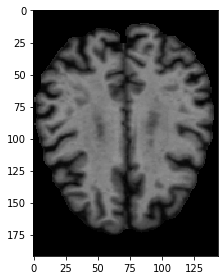

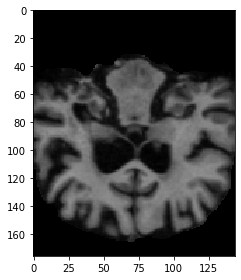

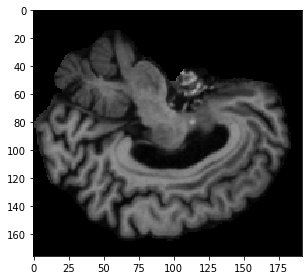

In [14]:
import numpy as np
import SimpleITK as sitk
from glob import glob
import skimage
import skimage.io
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
npz_path = "/data2/zhanghao/mae_project/test_affine/oasis_4_35_192_176_144_npz/crop_pad_data383.npz"
npz_array = np.load(npz_path)['image']


npz_array.shape
img = npz_array
# image_out = sitk.GetImageFromArray(npz_array)
# image_out.SetOrigin((-80.0, 112.0, 96.0))  # recovery ori size
# image_out.SetSpacing((1.0, 1.0, 1.0))
# image_out.SetDirection((1.0, 0.0, 0.0, 0.0, -0.0, -1.0, 0.0, -1.0, 0.0))

# sitk.WriteImage(image_out, 'D:\\ANDI\\data2.nii.gz')
img = (img - img.min())/(img.max()-img.min())
img.max(),img.min()
img = img.transpose((1,0,2))
img = np.flip(img,axis=0)
print(img.shape)
skimage.io.imshow(img_as_ubyte(img[120]))
plt.show()

skimage.io.imshow(img_as_ubyte(img[:,80,:]))
plt.show()

skimage.io.imshow(img_as_ubyte(img[:,:,80]))
plt.show()

# 将oasis数据集处理成npz文件

In [2]:
#全局配置文件
class GlobalConfig:
    root_dir = '/data/qiuhui/code/graph/C2FViT/Data/OASIS'
    train_root_dir = '/data2/zhanghao/oasis4_35/train/'
    path_to_csv = '/data2/zhanghao/oasis4_35/oasis_csv'  
    

config = GlobalConfig()

In [23]:
paths = []
oasis_path = config.root_dir
cnt = 1
for i in os.listdir(oasis_path):
    if 'OASIS' not in  i: continue
    paths.append(os.path.join(oasis_path,i,'aligned_norm.nii.gz'))
    
ids = []
oasis_path = config.root_dir
for i in os.listdir(oasis_path):
    if 'OASIS' not in  i: continue
    ids.append(i)
    print(i)

mask4_paths=[]
oasis_path = config.root_dir
for i in os.listdir(oasis_path):
    if 'OASIS' not in  i: continue
    mask4_paths.append(os.path.join(oasis_path,i,'aligned_seg4.nii'))

mask35_paths=[]
oasis_path = config.root_dir
for i in os.listdir(oasis_path):
    if 'OASIS' not in  i: continue
    mask35_paths.append(os.path.join(oasis_path,i,'aligned_seg35.nii.gz'))

data_frame = pd.DataFrame()
data_frame['Id']=ids
data_frame['image_paths'] = paths
data_frame['mask4_paths'] = mask4_paths
data_frame['mask35_paths'] = mask35_paths
# oasis_df = pd.DataFrame('Id','path')
# data_frame.to_csv(config.path_to_csv)
data_frame
data_frame.to_csv(config.path_to_csv)

OASIS_OAS1_0278_MR1
OASIS_OAS1_0192_MR1
OASIS_OAS1_0138_MR1
OASIS_OAS1_0371_MR1
OASIS_OAS1_0169_MR1
OASIS_OAS1_0438_MR1
OASIS_OAS1_0043_MR1
OASIS_OAS1_0197_MR1
OASIS_OAS1_0188_MR1
OASIS_OAS1_0038_MR1
OASIS_OAS1_0241_MR1
OASIS_OAS1_0199_MR1
OASIS_OAS1_0262_MR1
OASIS_OAS1_0243_MR1
OASIS_OAS1_0354_MR1
OASIS_OAS1_0406_MR1
OASIS_OAS1_0400_MR1
OASIS_OAS1_0380_MR1
OASIS_OAS1_0288_MR1
OASIS_OAS1_0018_MR1
OASIS_OAS1_0239_MR1
OASIS_OAS1_0394_MR1
OASIS_OAS1_0019_MR1
OASIS_OAS1_0423_MR1
OASIS_OAS1_0045_MR1
OASIS_OAS1_0323_MR1
OASIS_OAS1_0079_MR1
OASIS_OAS1_0361_MR1
OASIS_OAS1_0277_MR1
OASIS_OAS1_0305_MR1
OASIS_OAS1_0109_MR1
OASIS_OAS1_0039_MR1
OASIS_OAS1_0301_MR1
OASIS_OAS1_0337_MR1
OASIS_OAS1_0086_MR1
OASIS_OAS1_0330_MR1
OASIS_OAS1_0017_MR1
OASIS_OAS1_0214_MR1
OASIS_OAS1_0401_MR1
OASIS_OAS1_0368_MR1
OASIS_OAS1_0285_MR1
OASIS_OAS1_0434_MR1
OASIS_OAS1_0432_MR1
OASIS_OAS1_0163_MR1
OASIS_OAS1_0298_MR1
OASIS_OAS1_0064_MR1
OASIS_OAS1_0107_MR1
OASIS_OAS1_0133_MR1
OASIS_OAS1_0321_MR1
OASIS_OAS1_0092_MR1


In [3]:
oasis_df = pd.read_csv(config.path_to_csv)
oasis_df

,Unnamed: 0,Id,image_paths,mask4_paths,mask35_paths
0,0,OASIS_OAS1_0278_MR1,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...
1,1,OASIS_OAS1_0192_MR1,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...
2,2,OASIS_OAS1_0138_MR1,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...
3,3,OASIS_OAS1_0371_MR1,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...
4,4,OASIS_OAS1_0169_MR1,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...
...,...,...,...,...,...
409,409,OASIS_OAS1_0070_MR1,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...
410,410,OASIS_OAS1_0259_MR1,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...
411,411,OASIS_OAS1_0122_MR1,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...
412,412,OASIS_OAS1_0273_MR1,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...,/data/qiuhui/code/graph/C2FViT/Data/OASIS/OASI...


In [7]:
from PIL import Image
import cv2
class OasisDataset(Dataset):
    def __init__(self, df: pd.DataFrame):
        self.df = df  # 表示传入的df是哪一个

    def __len__(self):
        return self.df.shape[0]  # 在df中，[0]是有多少行(数据数)，[1]是多少列(属性)

    def __getitem__(self, idx):
        id_ = self.df.loc[idx, 'Id']
        img_path = self.df.loc[self.df['Id'] == id_]['image_paths'].values[0]
        mask4_path = self.df.loc[self.df['Id'] == id_]['mask4_paths'].values[0]
        mask35_path = self.df.loc[self.df['Id'] == id_]['mask35_paths'].values[0]

        #load image
        img= sitk.ReadImage(img_path)
        mask4 = sitk.ReadImage(mask4_path)
        mask35 = sitk.ReadImage(mask35_path)
        # mask = (mask>0)  
        
        #get array and crop
        img = sitk.GetArrayFromImage(img)
        mask4 = sitk.GetArrayFromImage(mask4)
        mask35 = sitk.GetArrayFromImage(mask35)


        #to numpy
        img = img.astype(np.float32) 
        mask4 = mask4.astype(np.float32)
        mask35 = mask35.astype(np.float32)


        #变形
        img = img.transpose((1,0,2))
        img = np.flip(img,axis=0)
        mask4 = mask4.transpose((1,0,2))
        mask4 = np.flip(mask4,axis=0)
        mask35 = mask35.transpose((1,0,2))
        mask35 = np.flip(mask35,axis=0)

        #norm
        img = (img-img.min())/(img.max()-img.min())
        # mask4 = (mask4-mask4.min())/(mask4.max()-mask4.min())
        # mask35 = (mask35-mask35.min())/(mask35.max()-mask35.min())

        img = torch.from_numpy(np.ascontiguousarray(img))   
        mask4 = torch.from_numpy(np.ascontiguousarray(mask4))   
        mask35 = torch.from_numpy(np.ascontiguousarray(mask35))   
        
        #norm
        print(img.shape,img.max(),img.min(),mask4.max(),mask4.min(),mask35.max(),mask35.min())


        return {
                "image": img,
                "mask4": mask4,
                "mask35":mask35
            }


In [8]:
train_dataset = OasisDataset(oasis_df)
train_loader = DataLoader(
    train_dataset,
    batch_size=1,  # 每次传入1个nii文件
    # num_workers=num_workers,
    # pin_memory=True,
)
path = config.train_root_dir
for l,data in enumerate(train_loader):
    img = data['image'].squeeze(0).numpy()
    mask4 = data['mask4'].squeeze(0).numpy()
    mask35 = data['mask35'].squeeze(0).numpy()
    assert img.shape == mask4.shape and img.shape == mask35.shape

    # assert img.shape[0] == 1 ,img.shape[1] == 192 and img.shape[2] == 176 and img.shape[3] == 144
    np.savez(path+"data"+str(l)+'.npz',image = img, mask4 = mask4 ,mask35 = mask35)

torch.Size([192, 224, 160]) tensor(1.) tensor(0.) tensor(4.) tensor(0.) tensor(35.) tensor(0.)
torch.Size([192, 224, 160]) tensor(1.) tensor(0.) tensor(4.) tensor(0.) tensor(35.) tensor(0.)
torch.Size([192, 224, 160]) tensor(1.) tensor(0.) tensor(4.) tensor(0.) tensor(35.) tensor(0.)
torch.Size([192, 224, 160]) tensor(1.) tensor(0.) tensor(4.) tensor(0.) tensor(35.) tensor(0.)
torch.Size([192, 224, 160]) tensor(1.) tensor(0.) tensor(4.) tensor(0.) tensor(35.) tensor(0.)
torch.Size([192, 224, 160]) tensor(1.) tensor(0.) tensor(4.) tensor(0.) tensor(35.) tensor(0.)
torch.Size([192, 224, 160]) tensor(1.) tensor(0.) tensor(4.) tensor(0.) tensor(35.) tensor(0.)
torch.Size([192, 224, 160]) tensor(1.) tensor(0.) tensor(4.) tensor(0.) tensor(35.) tensor(0.)
torch.Size([192, 224, 160]) tensor(1.) tensor(0.) tensor(4.) tensor(0.) tensor(35.) tensor(0.)
torch.Size([192, 224, 160]) tensor(1.) tensor(0.) tensor(4.) tensor(0.) tensor(35.) tensor(0.)
torch.Size([192, 224, 160]) tensor(1.) tensor(0.) 

# 转成新的nii文件

In [9]:
new_path = '/data2/zhanghao/oasis4_35/new_nii/'


def trans_oasis_nii(npz_path,path,k):

    img = np.load(npz_path)['image']
    mask4 = np.load(npz_path)['mask4']
    mask35 = np.load(npz_path)['mask35']
    
    image_out = sitk.GetImageFromArray(img)
    image_out.SetOrigin((188.0, -22.0, 4.0))  # recovery ori size (188.0, -22.0, 4.0)
    image_out.SetSpacing((1.0, 1.0, 1.0))
    image_out.SetDirection((-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0))
    # 原始方向(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)

    mask4_out = sitk.GetImageFromArray(mask4)
    mask4_out.SetOrigin((188.0, -22.0, 4.0))  # recovery ori size (188.0, -22.0, 4.0)
    mask4_out.SetSpacing((1.0, 1.0, 1.0))
    mask4_out.SetDirection((-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0))
    # 原始方向(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)

    mask35_out = sitk.GetImageFromArray(mask35)
    mask35_out.SetOrigin((188.0, -22.0, 4.0))  # recovery ori size (188.0, -22.0, 4.0)
    mask35_out.SetSpacing((1.0, 1.0, 1.0))
    mask35_out.SetDirection((-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0))
    # 原始方向(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)

    # sitk.WriteImage(image_out, path+'image_'+ str(k)+'.nii.gz')
    sitk.WriteImage(mask4_out, path+'mask4_'+ str(k)+'.nii.gz')
    sitk.WriteImage(mask35_out, path+'mask35_'+ str(k)+'.nii.gz')



cnt = 0
for i in os.listdir(config.train_root_dir):
    path = os.path.join(config.train_root_dir,i)
    trans_oasis_nii(path,new_path,k=cnt)
    print(cnt)
    cnt+=1
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# affine image的脚本

In [ ]:
'''
./antsRegistrationSyNQuick.sh -d 3 -t a 
-m /data2/zhanghao/data/andi_224_192_160/new_data0.nii.gz 
-f /data2/zhanghao/mae_project/test_affine/standard_norm.nii.gz 
-o /data2/zhanghao/data/andi_affine/test0.nii
'''

In [ ]:
import os
import multiprocessing as mp
def runSyn(task, force = False):
    print(task)
    os.system(task) 


# 使用传统工具配准
l = []

for i in range(2334):
    string = './antsRegistrationSyNQuick.sh -d 3 -t a '+'-m /data2/zhanghao/data/andi_224_192_160/new_data'+str(i)+'.nii.gz '+'-f /data2/zhanghao/mae_project/test_affine/standard_norm.nii.gz '+'-o /data2/zhanghao/data/andi_affine/test'+str(i)+'.nii \n'
    l.append(string)

with mp.Pool(40) as p:
    p.map(runSyn , l)
#====


# 分别将adni、oasis处理成npz文件、npy文件

In [1]:
#处理adni为npy文件
adni = '/data2/baihao/ADNI/final_orig_reg_t1/'
adni_npy = '/data2/zhanghao/adni/train_npy/'
path_to_csv = '/data2/zhanghao/adni/adni_csv'


paths = []
whole_paths = []
ids = []
oasis_path = adni
cnt = 1
for i in os.listdir(oasis_path):
    if i != 'demographic_label.csv': 
        paths.append(os.path.join(oasis_path,i))
        ids.append(i)

    
for i in paths:
    if i != 'demographic_label.csv':
        cnt = 0
        for j in os.listdir(i):
            cnt += 1
            whole_paths.append(os.path.join(oasis_path,i,j,'t1.nii.gz'))
            if cnt == 1 : break

# print(whole_paths)
len(whole_paths)


2334

In [13]:
data_frame = pd.DataFrame()
data_frame['Id']=ids
data_frame['image_paths'] = whole_paths

data_frame.to_csv(config.path_to_csv)

In [16]:
andi_df = pd.read_csv(config.path_to_csv)
andi_df

NameError: name 'config' is not defined

In [38]:
import numpy as np
import SimpleITK as sitk
from glob import glob
import skimage
import skimage.io
from skimage import img_as_ubyte

from PIL import Image
import cv2
class adni(Dataset):
    def __init__(self, df: pd.DataFrame):
        self.df = df  # 表示传入的df是哪一个

    def __len__(self):
        return self.df.shape[0]  # 在df中，[0]是有多少行(数据数)，[1]是多少列(属性)

    def __getitem__(self, idx):
        id_ = self.df.loc[idx, 'Id']
        img_path = self.df.loc[self.df['Id'] == id_]['image_paths'].values[0]

        #load image
        img= sitk.ReadImage(img_path)

        # mask = (mask>0)  
        
        #get array and crop
        img = sitk.GetArrayFromImage(img)



        #to numpy
        img = img.astype(np.float32) 

        img = np.pad(img,((3,3),(0,0),(3,3)),'constant')

        # print(img.max())
        
        #norm
        img = (img-img.min())/(img.max()-img.min())

        print(img.shape,img.max(),img.min())

        return {
                "image": img,

            }

train_dataset = adni(andi_df)
train_loader = DataLoader(
    train_dataset,
    batch_size=1,  # 每次传入1个nii文件
    # num_workers=num_workers,
    # pin_memory=True,
)
len(train_loader)
adni_npy

'/data2/zhanghao/adni/train_npy/'

In [39]:
adni_npy
cnt = 0
for i in train_loader:
    np.save(adni_npy+"train_data"+str(cnt)+'.npy',img)
    cnt += 1
    print(cnt)

(144, 176, 144) 1.0 0.0
1
(144, 176, 144) 1.0 0.0
2
(144, 176, 144) 1.0 0.0
3
(144, 176, 144) 1.0 0.0
4
(144, 176, 144) 1.0 0.0
5
(144, 176, 144) 1.0 0.0
6
(144, 176, 144) 1.0 0.0
7
(144, 176, 144) 1.0 0.0
8
(144, 176, 144) 1.0 0.0
9
(144, 176, 144) 1.0 0.0
10
(144, 176, 144) 1.0 0.0
11
(144, 176, 144) 1.0 0.0
12
(144, 176, 144) 1.0 0.0
13
(144, 176, 144) 1.0 0.0
14
(144, 176, 144) 1.0 0.0
15
(144, 176, 144) 1.0 0.0
16
(144, 176, 144) 1.0 0.0
17
(144, 176, 144) 1.0 0.0
18
(144, 176, 144) 1.0 0.0
19
(144, 176, 144) 1.0 0.0
20
(144, 176, 144) 1.0 0.0
21
(144, 176, 144) 1.0 0.0
22
(144, 176, 144) 1.0 0.0
23
(144, 176, 144) 1.0 0.0
24
(144, 176, 144) 1.0 0.0
25
(144, 176, 144) 1.0 0.0
26
(144, 176, 144) 1.0 0.0
27
(144, 176, 144) 1.0 0.0
28
(144, 176, 144) 1.0 0.0
29
(144, 176, 144) 1.0 0.0
30
(144, 176, 144) 1.0 0.0
31
(144, 176, 144) 1.0 0.0
32
(144, 176, 144) 1.0 0.0
33
(144, 176, 144) 1.0 0.0
34
(144, 176, 144) 1.0 0.0
35
(144, 176, 144) 1.0 0.0
36
(144, 176, 144) 1.0 0.0
37
(144, 176,

In [41]:
oasis_image = '/data2/zhanghao/oasis4_35/affine_image/'
oasis_mask4 = '/data2/zhanghao/oasis4_35/affine_mask4/'
oasis_mask35 = '/data2/zhanghao/oasis4_35/affine_mask35/'
images = []
mask4s = []
mask35s = []
for i in os.listdir(oasis_image):
    if 'niiInverse' not in i and 'Warped' in i : 
        images.append(os.path.join(oasis_image,i))

for i in os.listdir(oasis_mask4):
        mask4s.append(os.path.join(oasis_mask4,i))

for i in os.listdir(oasis_mask35):
        mask35s.append(os.path.join(oasis_mask35,i))

len(images),len(mask4s),len(mask35s)
images

['/data2/zhanghao/oasis4_35/affine_image/image_149.niiWarped.nii.gz',
 '/data2/zhanghao/oasis4_35/affine_image/image_234.niiWarped.nii.gz',
 '/data2/zhanghao/oasis4_35/affine_image/image_36.niiWarped.nii.gz',
 '/data2/zhanghao/oasis4_35/affine_image/image_368.niiWarped.nii.gz',
 '/data2/zhanghao/oasis4_35/affine_image/image_38.niiWarped.nii.gz',
 '/data2/zhanghao/oasis4_35/affine_image/image_87.niiWarped.nii.gz',
 '/data2/zhanghao/oasis4_35/affine_image/image_3.niiWarped.nii.gz',
 '/data2/zhanghao/oasis4_35/affine_image/image_354.niiWarped.nii.gz',
 '/data2/zhanghao/oasis4_35/affine_image/image_298.niiWarped.nii.gz',
 '/data2/zhanghao/oasis4_35/affine_image/image_297.niiWarped.nii.gz',
 '/data2/zhanghao/oasis4_35/affine_image/image_319.niiWarped.nii.gz',
 '/data2/zhanghao/oasis4_35/affine_image/image_207.niiWarped.nii.gz',
 '/data2/zhanghao/oasis4_35/affine_image/image_373.niiWarped.nii.gz',
 '/data2/zhanghao/oasis4_35/affine_image/image_257.niiWarped.nii.gz',
 '/data2/zhanghao/oasis4_

In [42]:
cnt = 0
path = '/data2/zhanghao/oasis4_35/train_npy/'
for i in images:
    

    img = sitk.ReadImage(i)  
    img = sitk.GetArrayFromImage(img)
    img = np.pad(img,((3,3),(0,0),(3,3)),'constant')
    img = (img - img.min())/(img.max()-img.min())
    print(img.shape,img.max(),img.min())

    np.save(path+"train_data"+str(cnt)+'.npy',img)
    print()
    cnt+=1


(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0

(144, 176, 144) 1.0 0.0



In [48]:
import re
path = '/data2/zhanghao/oasis4_35/train_npz/'
for i in images:
    string = i.split('/')[-1]
    number = re.findall("\d+",string)
    cnt = int(''.join(number))
    # print(string,cnt,number)
    img = sitk.ReadImage(i)  
    img = sitk.GetArrayFromImage(img)
    img = np.pad(img,((3,3),(0,0),(3,3)),'constant')
    img = (img - img.min())/(img.max()-img.min())
    # print(img.shape,img.max(),img.min())

    mask4_path = '/data2/zhanghao/oasis4_35/affine_mask4/mask4_'+str(cnt)+'.nii'
    mask35_path = '/data2/zhanghao/oasis4_35/affine_mask35/mask35_'+str(cnt)+'.nii'
    mask4 = sitk.ReadImage(mask4_path)  
    mask4 = sitk.GetArrayFromImage(mask4)
    mask4 = np.pad(mask4,((3,3),(0,0),(3,3)),'constant')
    mask35 = sitk.ReadImage(mask35_path)  
    mask35 = sitk.GetArrayFromImage(mask35)
    mask35 = np.pad(mask35,((3,3),(0,0),(3,3)),'constant')

    print(img.shape,img.max(),img.min(),mask4.max(),mask35.max(),mask4_path,mask35_path,i)

    np.savez(path+"train_data"+str(cnt)+'.npz',image = img, mask4 = mask4, mask35 = mask35)




(144, 176, 144) 1.0 0.0 4.0 35.0 /data2/zhanghao/oasis4_35/affine_mask4/mask4_149.nii /data2/zhanghao/oasis4_35/affine_mask35/mask35_149.nii /data2/zhanghao/oasis4_35/affine_image/image_149.niiWarped.nii.gz
(144, 176, 144) 1.0 0.0 4.0 35.0 /data2/zhanghao/oasis4_35/affine_mask4/mask4_234.nii /data2/zhanghao/oasis4_35/affine_mask35/mask35_234.nii /data2/zhanghao/oasis4_35/affine_image/image_234.niiWarped.nii.gz
(144, 176, 144) 1.0 0.0 4.0 35.0 /data2/zhanghao/oasis4_35/affine_mask4/mask4_36.nii /data2/zhanghao/oasis4_35/affine_mask35/mask35_36.nii /data2/zhanghao/oasis4_35/affine_image/image_36.niiWarped.nii.gz
(144, 176, 144) 1.0 0.0 4.0 35.0 /data2/zhanghao/oasis4_35/affine_mask4/mask4_368.nii /data2/zhanghao/oasis4_35/affine_mask35/mask35_368.nii /data2/zhanghao/oasis4_35/affine_image/image_368.niiWarped.nii.gz
(144, 176, 144) 1.0 0.0 4.0 35.0 /data2/zhanghao/oasis4_35/affine_mask4/mask4_38.nii /data2/zhanghao/oasis4_35/affine_mask35/mask35_38.nii /data2/zhanghao/oasis4_35/affine_ima

In [20]:
import numpy as np
import SimpleITK as sitk
from glob import glob
import skimage
import skimage.io
from skimage import img_as_ubyte

from PIL import Image
import cv2
class adni(Dataset):
    def __init__(self, paths):
        self.paths = paths  # 表示传入的df是哪一个

    def __len__(self):
        return len(paths)  # 在df中，[0]是有多少行(数据数)，[1]是多少列(属性)

    def __getitem__(self, idx):
        img_path = self.paths[idx]

        #load image
        img= sitk.ReadImage(img_path)

        # mask = (mask>0)  
        
        #get array and crop
        img = sitk.GetArrayFromImage(img)



        #to numpy
        img = img.astype(np.float32) 

        img = np.pad(img,((3,3),(0,0),(3,3)),'constant')

        # print(img.max())
        
        #norm
        img = (img-img.min())/(img.max()-img.min())

        print(img.shape,img.max(),img.min())

        return {
                "image": img,

            }

train_dataset = adni(whole_paths)
train_loader = DataLoader(
    train_dataset,
    batch_size=1,  # 每次传入1个nii文件
    # num_workers=num_workers,
    # pin_memory=True,
)
len(train_loader)

2334

In [4]:
import re
cnt = 0
for i in whole_paths:
    img = sitk.ReadImage(i)  
    img = sitk.GetArrayFromImage(img)
    img = np.pad(img,((3,3),(0,0),(3,3)),'constant')
    img = (img - img.min())/(img.max()-img.min())
    # print(img.shape,img.max(),img.min())
    print(img.shape,img.max(),img.min())
    np.save(i+"train_data"+str(cnt)+'.npy', img)
    cnt+=1

(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 

KeyboardInterrupt: 

In [5]:
import re
cnt = 0
path = '/data2/zhanghao/adni/train_npy/'
for i in whole_paths:
    img = sitk.ReadImage(i)  
    img = sitk.GetArrayFromImage(img)
    img = np.pad(img,((3,3),(0,0),(3,3)),'constant')
    img = (img - img.min())/(img.max()-img.min())
    # print(img.shape,img.max(),img.min())
    print(img.shape,img.max(),img.min())
    np.save(path+"train_data"+str(cnt)+'.npy', img)
    cnt+=1

(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 1.0 0.0
(144, 176, 144) 